In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as smp
import matplotlib.pyplot as plt 
from matplotlib import animation 
from matplotlib.animation import PillowWriter

# Define symbols
t = smp.symbols('t')
m, k, l = smp.symbols('m k l')

# Define functions
x1, y1, x2, y2, x3, y3 = smp.symbols('x1 y1 x2 y2 x3 y3', cls=smp.Function)
x1 = x1(t)
y1 = y1(t)
x2 = x2(t)
y2 = y2(t)
x3 = x3(t)
y3 = y3(t)

# First and second derivatives
x1d = smp.diff(x1, t)
x1dd = smp.diff(x1d, t)
y1d = smp.diff(y1, t)
y1dd = smp.diff(y1d, t)
x2d = smp.diff(x2, t)
x2dd = smp.diff(x2d, t)
y2d = smp.diff(y2, t)
y2dd = smp.diff(y2d, t)
x3d = smp.diff(x3, t)
x3dd = smp.diff(x3d, t)
y3d = smp.diff(y3, t)
y3dd = smp.diff(y3d, t)

# Lagrangian
T = 0.5 * m * (x1d**2 + y1d**2 + x2d**2 + y2d**2 + x3d**2 + y3d**2)
A = (smp.sqrt((x1 - x2)**2 + (y1 - y2)**2) - l)**2
B = (smp.sqrt((x1 - x3)**2 + (y1 - y3)**2) - l)**2
C = (smp.sqrt((x2 - x3)**2 + (y2 - y3)**2) - l)**2
U = 0.5 * k * (A + B + C)
L = T - U

# Lagrange equations
LE1 = smp.diff(L, x1) - smp.diff(smp.diff(L, x1d), t)
LE2 = smp.diff(L, y1) - smp.diff(smp.diff(L, y1d), t)
LE3 = smp.diff(L, x2) - smp.diff(smp.diff(L, x2d), t)
LE4 = smp.diff(L, y2) - smp.diff(smp.diff(L, y2d), t)
LE5 = smp.diff(L, x3) - smp.diff(smp.diff(L, x3d), t)
LE6 = smp.diff(L, y3) - smp.diff(smp.diff(L, y3d), t)

# Solve for second derivatives
sols = smp.solve([LE1, LE2, LE3, LE4, LE5, LE6], [x1dd, y1dd, x2dd, y2dd, x3dd, y3dd])

# Convert to numerical functions
args = (m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
x1dd_f = smp.lambdify(args, sols[x1dd], 'numpy')
y1dd_f = smp.lambdify(args, sols[y1dd], 'numpy')
x2dd_f = smp.lambdify(args, sols[x2dd], 'numpy')
y2dd_f = smp.lambdify(args, sols[y2dd], 'numpy')
x3dd_f = smp.lambdify(args, sols[x3dd], 'numpy')
y3dd_f = smp.lambdify(args, sols[y3dd], 'numpy')

# Let's define the ODE system
def dSdt(S, t, m, k, l):
    x1, x1d, y1, y1d, x2, x2d, y2, y2d, x3, x3d, y3, y3d = S
    
    # Debugging prints
    #print(f"x1 = {x1}, x1d = {x1d}, y1 = {y1}, y1d = {y1d}")
    #print(f"x2 = {x2}, x2d = {x2d}, y2 = {y2}, y2d = {y2d}")
    #print(f"x3 = {x3}, x3d = {x3d}, y3 = {y3}, y3d = {y3d}")
    
    x1dd_val = x1dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    y1dd_val = y1dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    x2dd_val = x2dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    y2dd_val = y2dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    x3dd_val = x3dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    y3dd_val = y3dd_f(m, k, l, x1, y1, x2, y2, x3, y3, x1d, y1d, x2d, y2d, x3d, y3d)
    
    # Debugging prints for the calculated second derivatives
    #print(f"x1dd = {x1dd_val}, y1dd = {y1dd_val}")
    #print(f"x2dd = {x2dd_val}, y2dd = {y2dd_val}")
    #print(f"x3dd = {x3dd_val}, y3dd = {y3dd_val}")
    
    return [
        x1d,
        x1dd_val,
        y1d,
        y1dd_val,
        x2d,
        x2dd_val,
        y2d,
        y2dd_val,
        x3d,
        x3dd_val,
        y3d,
        y3dd_val
    ]

# Initial conditions and time points
y0 = [-0.5, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 2, 0]
t = np.linspace(start=0, stop=20, num=1000)
m = 1
k = 1
l = 1

# Let's solve ODE 
ans = odeint(dSdt, y0, t, args=(m, k, l))
ans.T[0]


array([-0.5       , -0.49994841, -0.49979372, -0.49953618, -0.49917619,
       -0.49871431, -0.49815128, -0.49748797, -0.49672544, -0.49586489,
       -0.4949077 , -0.49385537, -0.4927096 , -0.49147222, -0.49014522,
       -0.48873074, -0.4872311 , -0.48564873, -0.48398625, -0.48224639,
       -0.48043207, -0.47854633, -0.47659236, -0.47457351, -0.47249325,
       -0.47035521, -0.46816316, -0.46592101, -0.46363282, -0.46130278,
       -0.45893521, -0.4565346 , -0.45410556, -0.45165285, -0.44918137,
       -0.44669617, -0.44420244, -0.44170552, -0.43921091, -0.43672426,
       -0.43425138, -0.43179824, -0.42937101, -0.426976  , -0.42461973,
       -0.42230892, -0.42005047, -0.41785153, -0.41571946, -0.41366187,
       -0.41168662, -0.40980185, -0.408016  , -0.40633781, -0.40477635,
       -0.40334103, -0.4020416 , -0.40088821, -0.39989136, -0.39906195,
       -0.3984112 , -0.39795071, -0.39769235, -0.39764818, -0.39783043,
       -0.39825126, -0.39892263, -0.39985608, -0.40106243, -0.40

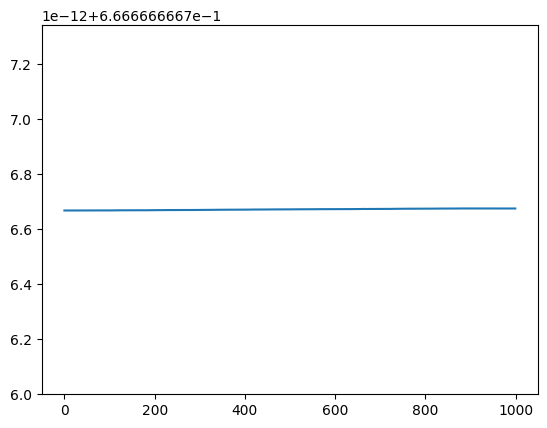

In [2]:
x1= ans.T[0]
y1= ans.T[2]
x2= ans.T[4]
y2= ans.T[6]
x3= ans.T[8]
y3= ans.T[10]

xg= (x1+x2+x3)/3
ygg= (y1/3+y2/3+y3/3)

plt.plot(ygg) #y vaue pf the centr of mass seems to be near 0.6666

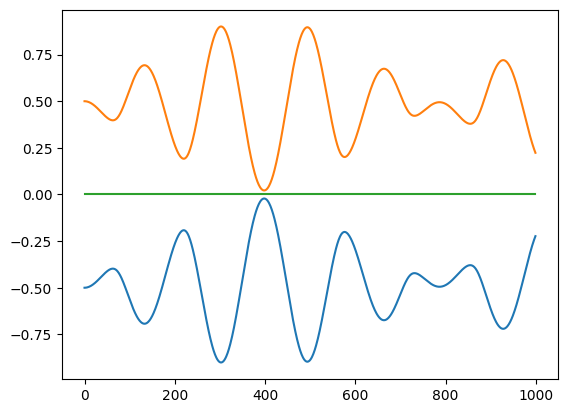

In [3]:
#plotting the x
plt.plot(ans.T[0])
plt.plot(ans.T[4])
plt.plot(ans.T[8]) #the upper bead moves on the x axis but so tinily that is neglectable with respect to the others 

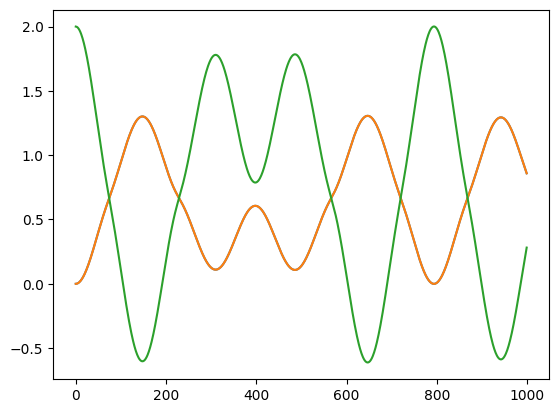

In [4]:
#plotting the y
plt.plot(ans.T[2])
plt.plot(ans.T[6])
plt.plot(ans.T[10])
#two of the graphs are superimposed

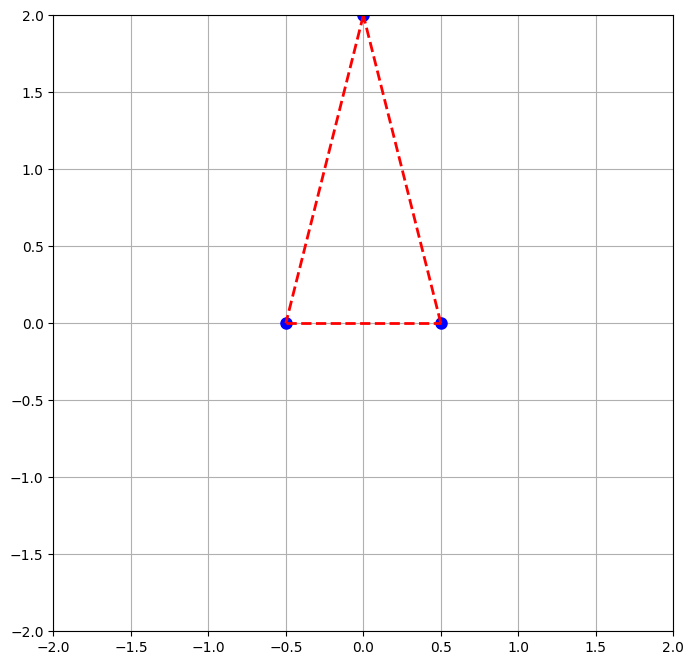

In [5]:
x1= ans.T[0]
y1= ans.T[2]
x2= ans.T[4]
y2= ans.T[6]
x3= ans.T[8]
y3= ans.T[10]



# Update function for animation
def animate(i):
    # Update the dots
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    
    # Update the red dashed lines
    line1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    line2.set_data([x2[i], x3[i]], [y2[i], y3[i]])
    line3.set_data([x3[i], x1[i]], [y3[i], y1[i]])

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.grid()

# Marker plot (blue dots)
ln1, = plt.plot([], [], 'bo', markersize=8)

# Line plots (red dashed lines)
line1, = plt.plot([], [], 'r--', lw=2)
line2, = plt.plot([], [], 'r--', lw=2)
line3, = plt.plot([], [], 'r--', lw=2)

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)

# Save the animation as a GIF
ani.save('pen1.gif', writer='pillow', fps=20)